In [21]:
import os
import glob
import re
import numpy as np
import pandas as pd
import scipy
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
%matplotlib inline

In [11]:
X_train_nolemma = scipy.sparse.load_npz("data/processed_descriptions/train_descriptions_noLemma.npz")
X_test_nolemma = scipy.sparse.load_npz("data/processed_descriptions/test_descriptions_noLemma.npz")
X_train_nouns_nolemma = scipy.sparse.load_npz("data/processed_descriptions/train_descriptions_nouns_noLemma.npz")
X_test_nouns_nolemma = scipy.sparse.load_npz("data/processed_descriptions/test_descriptions_nouns_noLemma.npz")

In [12]:
Y_train = scipy.sparse.load_npz("data/processed_tags/train_tag_nocat_tfdif.npz")
Y_test  = scipy.sparse.load_npz("data/processed_tags/test_tag_nocat_tfdif.npz")

In [16]:
def load_descriptions(path):
    data = []
    for filename in glob.glob(os.path.join(path, "*.txt")):
        with open(filename, "r") as description_file:
            label = os.path.splitext(os.path.basename(filename))[0]
            sentence = " ".join(line.strip() for line in description_file)
            new_row = (sentence, label) 
            data.append(new_row)

    dt = np.dtype([('sentence', object), ('label', 'int64')])
    return(np.array(data, dtype = dt))

train_descriptions_path = "data/descriptions_train/"
test_descriptions_path = "data/descriptions_test/"

train_data = load_descriptions(train_descriptions_path)
test_data = load_descriptions(test_descriptions_path)

train_data.sort(order = 'label', axis = 0)
test_data.sort(order = 'label', axis = 0)

In [2]:
def map20(test, sim_matrix): 
    total_score = 0
    for num, idx in enumerate(test):
        score = 0
        rank = np.argwhere(np.argsort(sim_matrix[num])[::-1] == num)[0][0]
        if rank <20:
            score = (20 + 1-(rank+1))/20
        else:
            score = 0 
        total_score += score
    return total_score

In [60]:
pls_resnet_all = np.loadtxt("output/nolemma_plsr_resnet_all_sims.txt")
pls_resnet_nouns = np.loadtxt("output/nolemma_plsr_resnet_noun_sims.txt")
pls_resnet_all_rev = np.loadtxt("output/rev_nolemma_plsr_resnet_all_sims.txt")
pls_resnet_nouns_rev = np.loadtxt("output/rev_nolemma_plsr_resnet_noun_sims.txt")
mlp_autoencoder_tags = np.loadtxt("output/mlp_reg_sims.txt")
# lsvc_tags = np.loadtxt("output/lsvc_sims.txt")
pls_resnet_verbs = np.loadtxt("output/verbs_resnet_sims.txt")

In [76]:
pls_resnet_all = np.loadtxt("output200/all_resnet_200_sims.txt")
pls_resnet_nouns = np.loadtxt("output/nc500_nolemma_plsr_resnet_all_sims.txt")
pls_resnet_all_rev = np.loadtxt("output200/nc200_nolemma_plsr_resnet_all_sims.txt")
pls_resnet_nouns_rev = np.loadtxt("output200/nc200_nolemma_sim_test.txt")
mlp_autoencoder_tags = np.loadtxt("output/mlp_reg_sims.txt")
# lsvc_tags = np.loadtxt("output/lsvc_sims.txt")
pls_resnet_verbs = np.loadtxt("output200/verbs_resnet_200_sims.txt")

In [77]:
merged_sims = (pls_resnet_all + pls_resnet_nouns + mlp_autoencoder_tags + pls_renset_verbs + pls_resnet_all_rev + pls_resnet_nouns_rev)/6

In [40]:
# merged_ranks = (pls_resnet_all_ranks + pls_resnet_nouns_ranks + mlp_autoencoder_tags_ranks + pls_resnet_verbs_ranks)/4

In [78]:
with open('output/pls_resnet_mlp_autoencoder_nc200.txt', 'w') as f:
    for i in range(0, X_test_nolemma.shape[0]):
        row = " ".join([str(img) + ".jpg" for img in np.argsort(merged_sims[i])[::-1][0:20]])
        row = str(i) + ".txt," + row
        f.write("%s\n" % row)

('A sky full of a flock of birds on a cloudy day. Hundreds of birds soaring through a cloudy sky. A flock of birds flying in the clouds Birds flying in the gray and overcast skies. A flock of birds circling an over cast sky.', 1000)



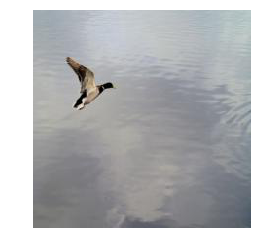

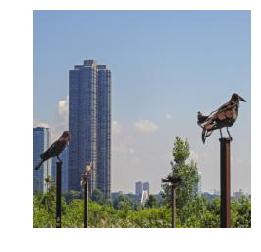

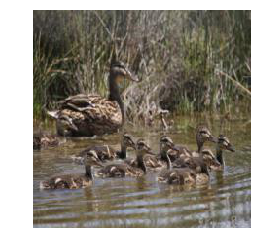

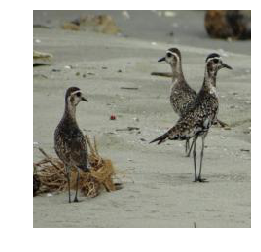

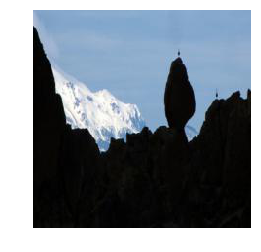

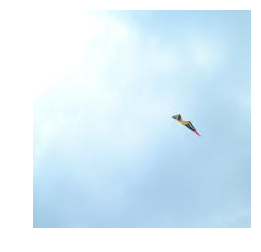

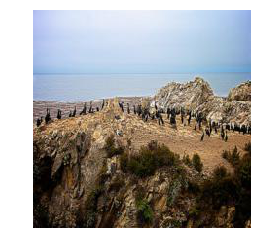

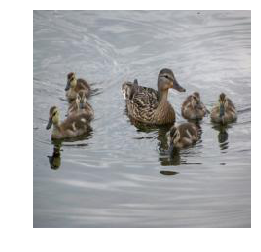

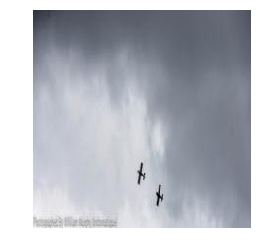

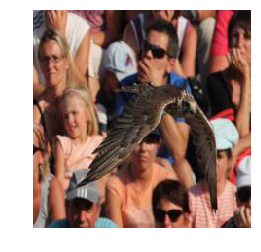

("a person and their dog are browsing on the mac book A brown and black dog standing next to a man sitting on a laptop computer. A dog is resting it's head on a laptop while watching the screen. A dog has it's face on a laptop computer. A dog resting its head on a laptop keyboard.", 1001)



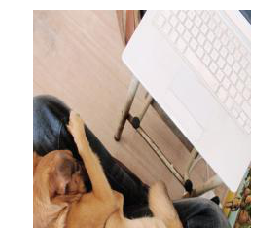

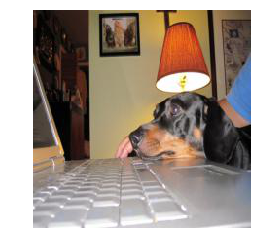

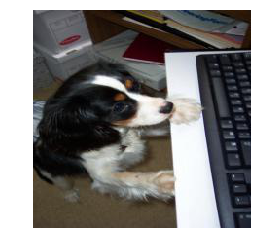

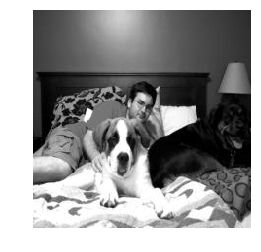

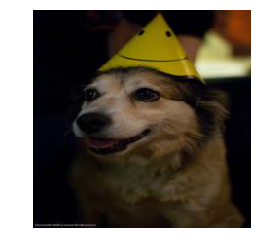

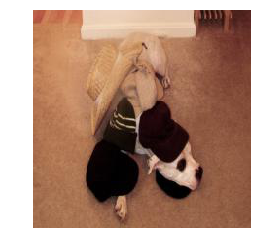

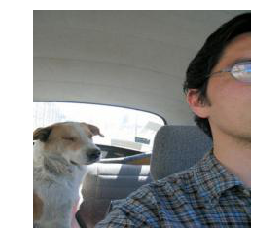

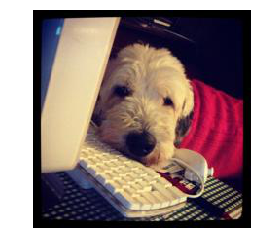

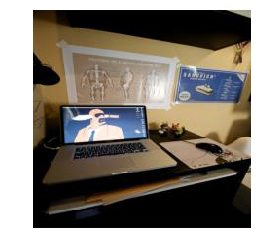

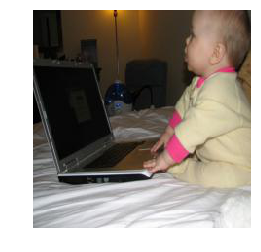

('A young man holding a stuffed teddy bear and a white umbrella. A young men is holding a stuffed animal and an umbrella. A man with a stuffed toy holds an umbrella. A man holding a teddybear and an umbrella. A man holding an umbrella in one hand and a stuffed animal in the other.', 1002)



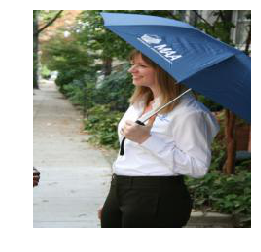

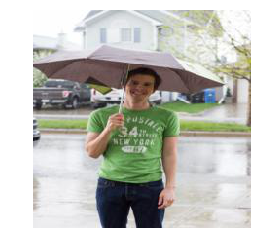

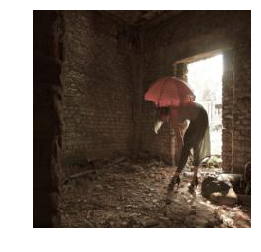

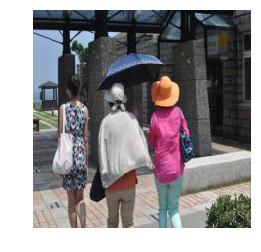

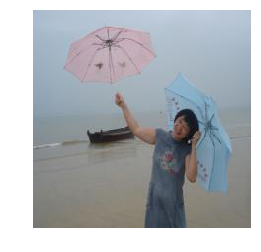

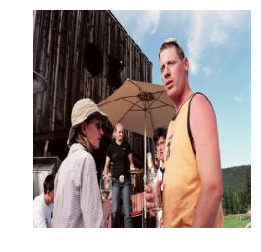

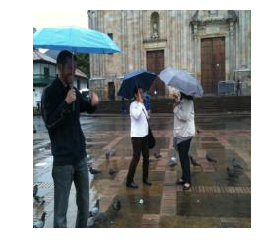

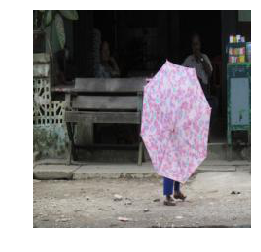

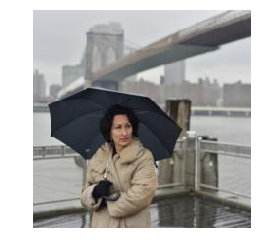

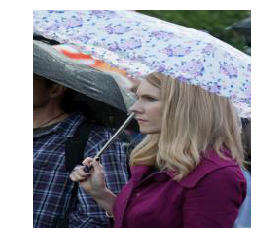

('A red VW bus parked on the side of a road. An old Volkswagen bus parked next to the curb. A beat up orange van is parked by the curb. a red van is parked by a curb An old red VW van sitting on the street', 1003)



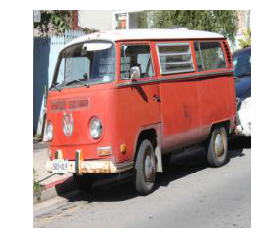

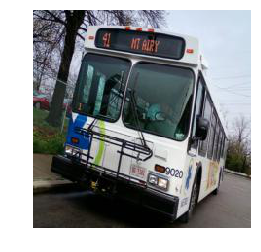

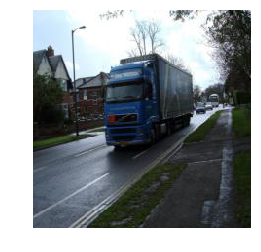

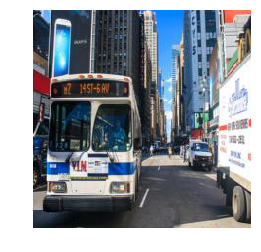

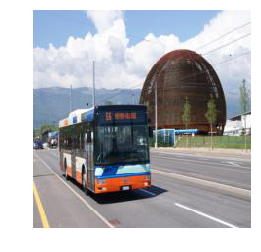

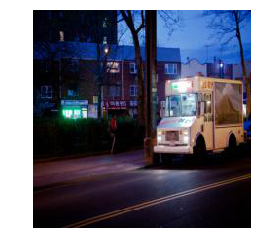

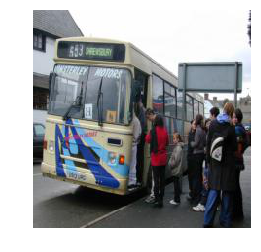

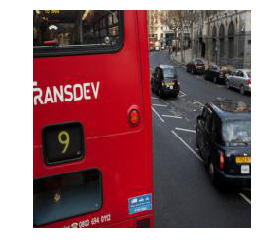

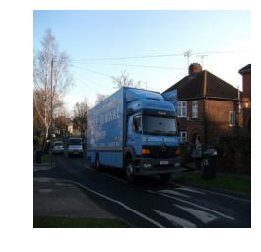

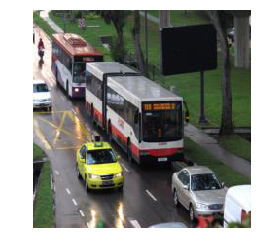

('An commerical airplane is flying high in the sky a plane flying by below a bright blue sky A large plane is flying through the sky. GREEN AIRPLANE FLYING IN A BRIGHT BLUE SKY a commercial jet airliner as seen from below', 1004)



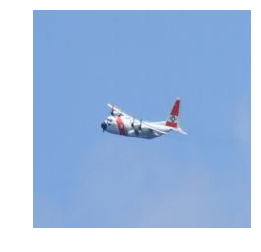

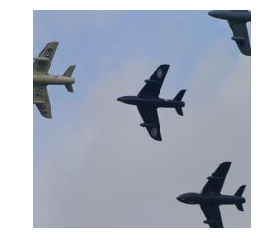

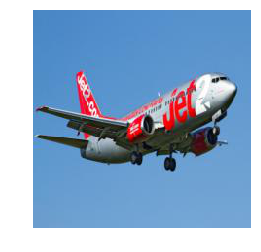

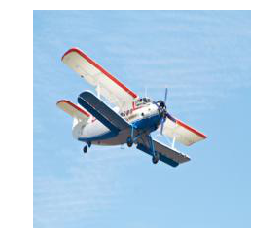

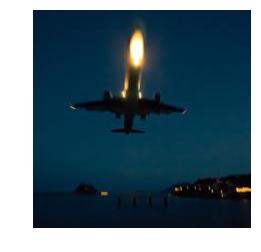

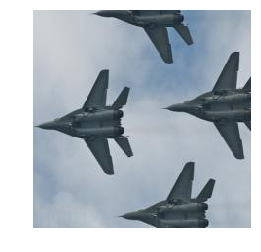

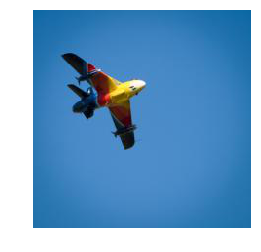

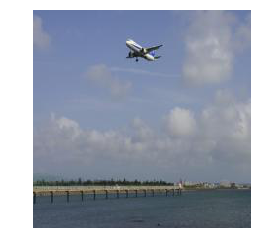

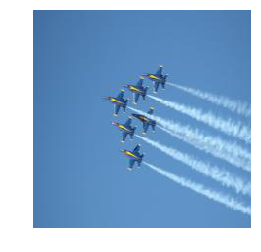

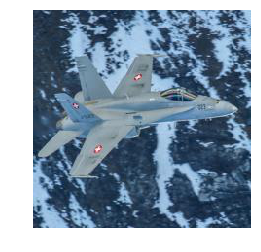

('A man that is walking next to a train. A man walking next to a blue and yellow train. A man wearing a backpack walking by a passenger train. a person walking on a train station platform The person wearing the backpack is walking beside of the bus.', 1005)



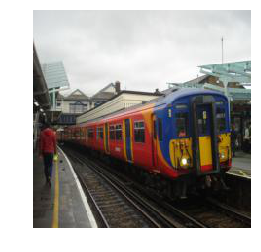

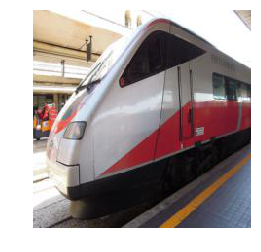

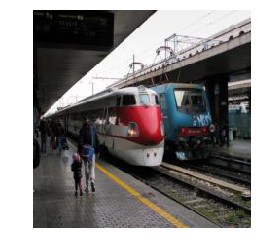

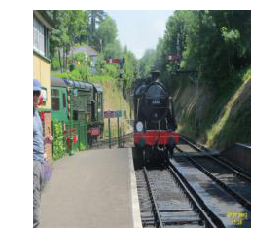

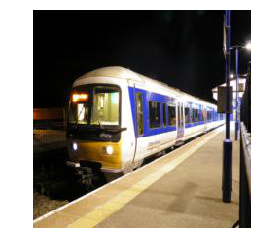

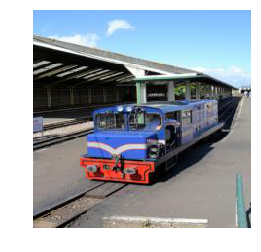

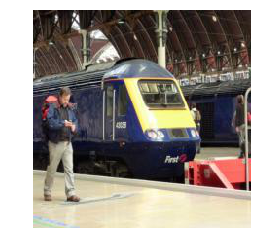

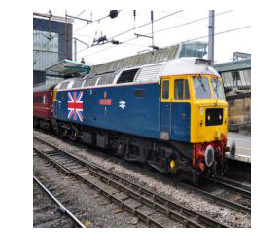

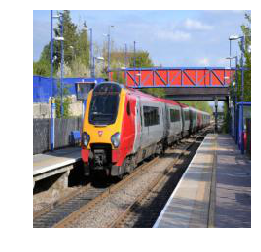

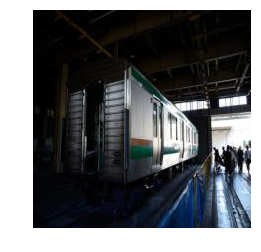

('A man holding a tennis racket while playing a game of tennis. A tennis player is poised in position with racquet upheld. A man assuming a stance to hit a tennis ball. A man playing tennis at a tennis match. A gentleman doing a "happy dance" during a tennis competition.', 1006)



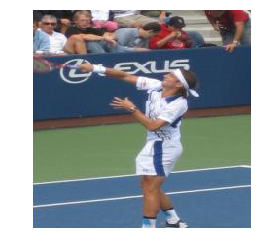

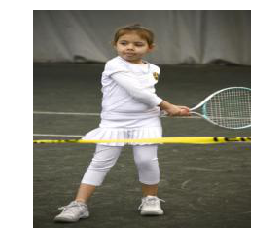

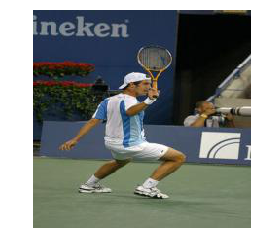

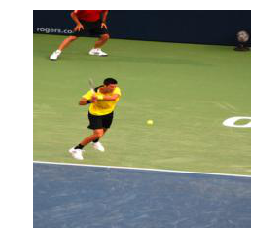

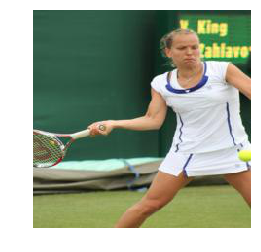

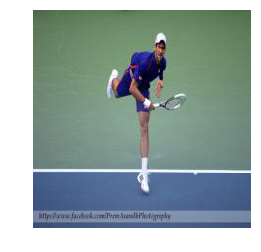

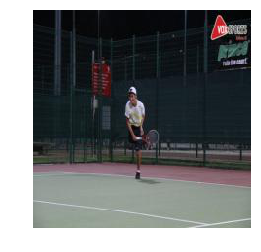

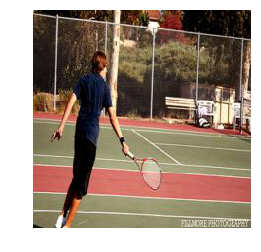

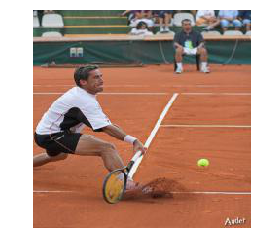

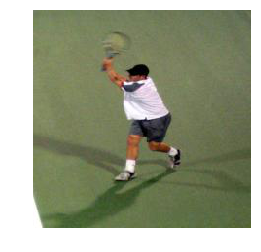

('an image of a kitchen and joined living room There is a living room with chairs in it a living room with a green chair and a television on a dresser A living room filled with furniture and a flat screen TV. a very nice house very well arranged chairs', 1007)



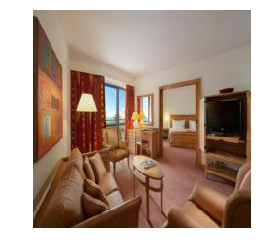

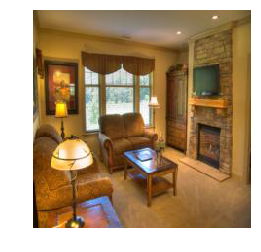

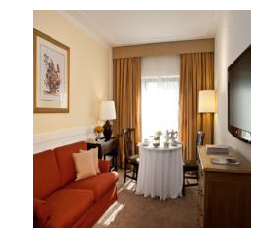

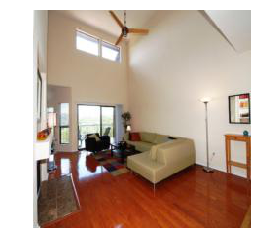

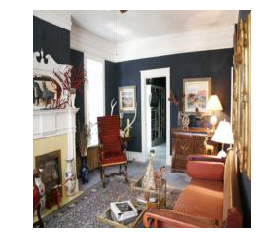

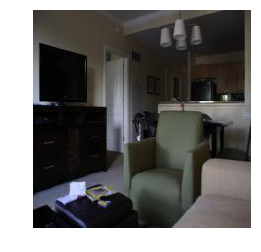

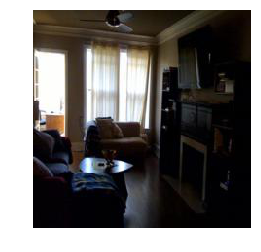

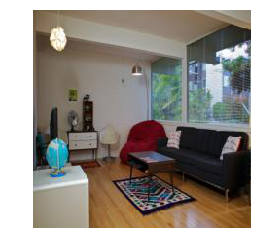

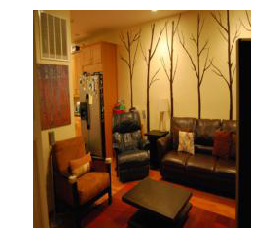

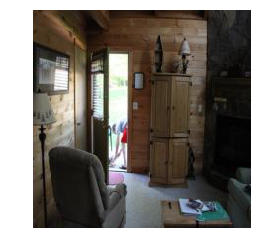

('some veggies and other foods are mixed together A roasting pan with roasted broccoli, brussel sprouts and mushrooms on it. some broccoly and brussel sprouts sitting on a piece of tin foil Looking down at roasted broccoli, Brussel sprouts, and walnuts Brussell sprouts and broccoli that are on tin foil.', 1008)



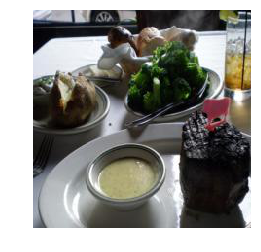

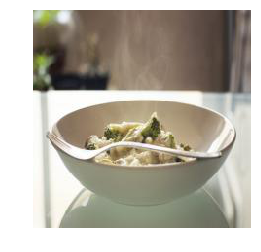

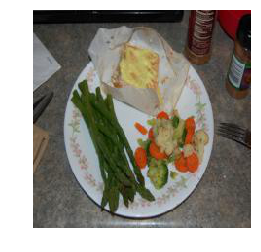

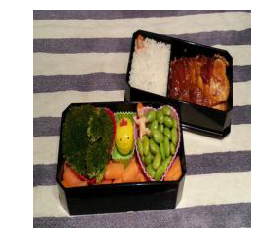

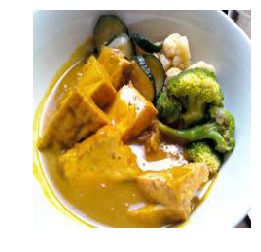

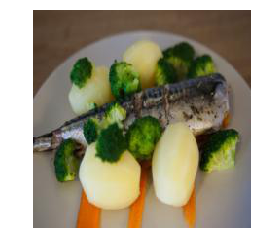

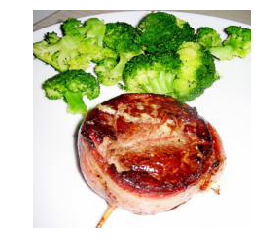

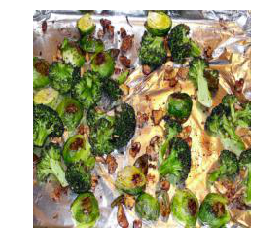

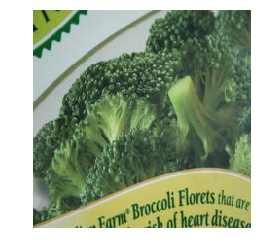

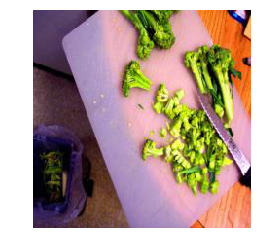

('An old time photograph of a young man. An old photo of a man in a suit. A man in an old picture wearing a suit and tie. A black and white photo of a man,looks old. An old photograph depicts a young boy in nice clothes.', 1009)



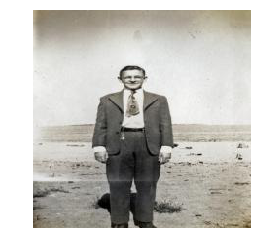

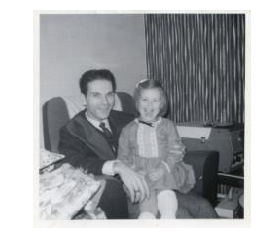

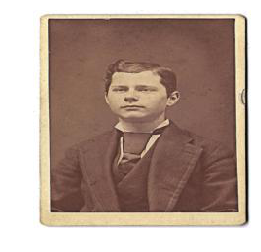

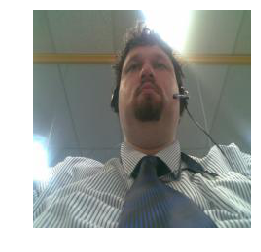

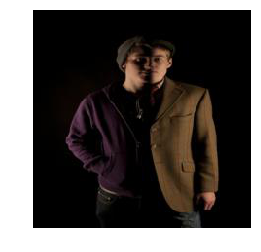

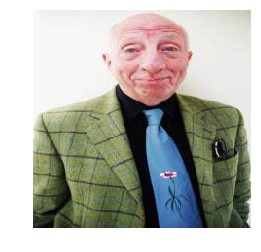

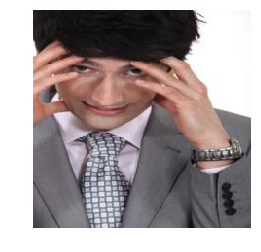

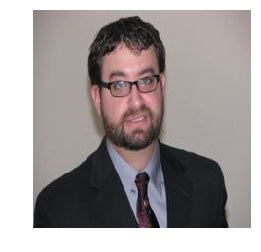

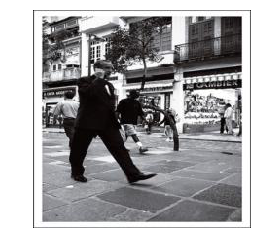

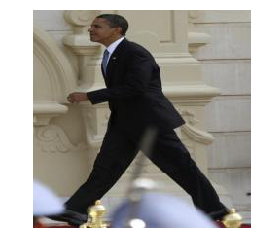

In [89]:
for i in (range(1000, 1010)):
    print(test_data[i])
    print()
    for j in np.argsort(merged_sims[i])[::-1][0:10]:
        img = Image.open("./data/images_test/" + str(j) + ".jpg")
        img = np.asarray(img)
        plt.imshow(img)
        plt.axis('off')
        plt.show()